# House Price Prediction with Regression and Random Forest

L'objectif de ce projet est de prédire les prix des logements à l'aide d'un algorithme d'apprentissage automatique de base, la régression linéaire, et d'un algorithme avancé, Random Forest. Vous utiliserez également la régression avec régularisation telle que Ridge et Lasso pour essayer d'améliorer la précision de nos prédictions.

Les ensembles de données Kaggle House Prices peuvent être téléchargés [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/). 

# Partie A : Initialisation

- Importez les libraries nécéssaire

NB: s'il y a une librairie non disponible, il faut l'installer

In [161]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


from sklearn import datasets, linear_model
from sklearn import metrics 
from sklearn.metrics import r2_score #
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Partie B: Exploration des données

Dans le dossier dataset, vous avez deux fichiers :
- Un fichier dénommé  train.csv
- Un fichier dénommé  test.csv

Utilisez la librarie pandas pour charger chacun de ces fichiers dans un dataframe.

- Pour le fichier train.csv, utilisez la variable df pour le charger dans un datfarme

- Pour le fichier test.csv, utilisez la variable test_df pour le charger dans un dataframe

In [162]:
df = pd.read_csv('dataset/train.csv')             ## Complétez
test_df = pd.read_csv('dataset/test.csv')             ## Complétez
                  

In [163]:
df.shape

(1460, 81)

In [164]:

#print(df)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [165]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


- Quelle est la fonction qui permet de charger un fichier csv ? 

- Quelle fonction vous permet d'afficher  le nombre de ligne dans le dataframe ? 

- Quelle fonction vous permet d'afficher  le nombre de colonnes dans le dataframe ? 

- Que fait la fonction .head() de la librairie pandas ? 

- Appellez toutes les fonctions précédentes et affichez leurs sorties

In [166]:
test_df=pd.read_csv('dataset/test.csv')
test_df.shape
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- Que font les lignes de code ci-dessous ? Commentez-les ainsi que le résulat.

In [167]:

#ce code nous fait la somme des valeurs manquantes du dataframe train
df.isnull().sum()                                       
#somme des valeurs manquantes et tries dans l'ordre décroissant du dataframe train
miss_val = df.isnull().sum().sort_values(ascending=False) 
#somme des valeurs manquantes et tries dans l'ordre décroissant de la colonne MissvalCount 
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])
#calcul du pourcentage des valeurs de la colonne MissvalCount
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
#recupération des miss_val.MissvalCount supérieur a zero
miss_val = miss_val[miss_val.MissvalCount > 0]


In [168]:
df.isnull().sum()                 #nous fait la somme des valeurs nulles 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [169]:
miss_val = df.isnull().sum().sort_values(ascending=False)  
miss_val   #somme des valeurs manquantes et tries dans l'ordre décroissant du dataframe train

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

- Supprimez toutes les colonnes ayant plus de 45% de valeurs manquantes

In [170]:
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])
miss_val  #crée un nouveau dataframe de la colonne MissvalCount en triant
        #la somme des valeurs manquentes dans l'ordre décroissant

,MissvalCount
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
...,...
CentralAir,0
SaleCondition,0
Heating,0
TotalBsmtSF,0


In [171]:
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val['Percent']    #calcul des valeurs de la colonne en pourcentage 

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Name: Percent, Length: 81, dtype: object

In [172]:
miss_val.MissvalCount

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Name: MissvalCount, Length: 81, dtype: int64

In [173]:
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val   #fait la décompt des valeurs superieur a 0 de la colonne MissvalCount

,MissvalCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [174]:
# suppression de colonnes

df.columns #affichage des noms de colonne 


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [175]:
miss_val.columns ###complétez

Index(['MissvalCount', 'Percent'], dtype='object')

In [176]:
miss_val['Percent']

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Name: Percent, dtype: object

In [177]:
miss_val['Percent']=miss_val['Percent'].astype(float)#les valeurs transformées en valeurs
miss_val['Percent']

<ipython-input-177-4d3ec7c1bf8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_val['Percent']=miss_val['Percent'].astype(float)#les valeurs transformées en valeurs


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Name: Percent, dtype: float64

In [178]:
miss_val=miss_val[(miss_val['Percent'] > 45 )]
miss_val

,MissvalCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26


In [179]:
miss_val.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [180]:
position = miss_val.index
position =position.tolist()
type(position)


list

In [181]:
for colonne in position:
    df =df.drop(colonne,axis=1)

In [182]:
#1460 rows × 81 columns
df.shape

(1460, 76)

In [183]:
df.shape

(1460, 76)

- Supprimez les lignes ayant au moins une valeur manquante

In [184]:
# suppression de  ligne ayant au moins  valeur manquante
df=df.dropna(axis=0)   
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [185]:
#(1460, 76)
df.shape

(1094, 76)

In [186]:
df.tail()                        #affichage des 5 derniéres lignes pour vérifier

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [187]:
df.head()                    #affichage des 5 premiéres lignes pour vérifier

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Explore data

In [188]:
x='SalePrice'
type(x)



str

In [189]:

x=df['SalePrice'].astype(float)


- Examinez la distribution de la variable SalePrice. s'agit-elle d'une distribution normale ? 

NB: pour examiner la distribution, il faut visualiser la courbe de distribution en utilisant la fonction sns.distplot(). voir la documentation [ici](https://seaborn.pydata.org/generated/seaborn.distplot.html)

C:\Users\user-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


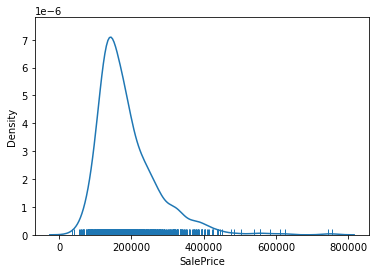

In [190]:
ax = sns.distplot(x, rug=True, hist=False)

In [191]:
# Check distribution of target variable

- En utilisant la fonction np.log(), transformez les valeurs dans df['LogOfPrice'] en valeurs logarithmiques. 

NB: Il faut commencer par calculer la log des valeurs, ensuite remplacer les veleurs de df['LogOfPrice'] par le résultat, en déclarant une nouvelle colonne nommée 'LogOfPrice' et en supprimant la colonne 'SalePrice'

In [192]:
x

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1094, dtype: float64

In [193]:
df['LogOfPrice'] = np.log(x)### compléter
df['LogOfPrice']


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: LogOfPrice, Length: 1094, dtype: float64

In [194]:
df #apres création de la nouvelle colonne LogOfPrice

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogOfPrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,12.072541
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,12.254863
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,12.493130
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,11.864462


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

In [196]:
df=df.drop(['SalePrice'],axis=1)##Compléter dela suppression de la colonne SalePrice
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogOfPrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,11.864462


- Que fait la ligne de code ci-dessous ? Commentez

In [197]:
# Review the skewness of each feature
df.skew().sort_values(ascending=False)
#permet de trouver l'asymétrie et triant dans l'ordre décroissant

LotArea          15.508309
PoolArea         13.614615
3SsnPorch        11.069793
LowQualFinSF      9.896145
MiscVal           9.673292
KitchenAbvGr      5.587741
BsmtFinSF2        4.372440
BsmtHalfBath      4.049639
ScreenPorch       3.962075
EnclosedPorch     3.165433
MasVnrArea        2.695262
OpenPorchSF       2.382985
TotalBsmtSF       2.314581
LotFrontage       2.227272
BsmtFinSF1        1.931425
GrLivArea         1.553875
WoodDeckSF        1.525006
MSSubClass        1.428836
1stFlrSF          1.371529
BsmtUnfSF         0.884701
OverallCond       0.862376
2ndFlrSF          0.790156
GarageArea        0.726787
TotRmsAbvGrd      0.721070
Fireplaces        0.629886
HalfBath          0.607079
BsmtFullBath      0.532962
LogOfPrice        0.304486
OverallQual       0.298295
GarageCars        0.210251
MoSold            0.168709
YrSold            0.122460
Id                0.020785
FullBath          0.019856
BedroomAbvGr      0.016689
YearRemodAdd     -0.585271
YearBuilt        -0.633765
G

In [198]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogOfPrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,11.864462


# Partie C : Train-Test Split dataset


Avant de pouvoir commencer à modéliser les données, nous devons diviser l'ensemble de données en ensemble d'apprentissage et de test.

- Commentez le plus clair possible les lignes de code ci-dessous

In [199]:
# corrresond a la colonne LogOfPrice  
df_temp = df.select_dtypes(include=["int64","float64"]) 
#selectionne de type ou de chaine a inclure ou exclure
X = df_temp.drop(["LogOfPrice"],axis=1)
# correspond a toutes les colonnes sauf la colonne y qui est supprimée 

In [200]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [201]:
y = df_temp['LogOfPrice']
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: LogOfPrice, Length: 1094, dtype: float64

In [202]:
#df_temp = df.select_dtypes(exclude=["int64","float64"]) 
#df_temp

- Subdivisez le jeux de données en :

- 75% de train
- 25% de test

NB: pour cela, utilisez la fonction train_test_split. Voir docummentation [ici](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [203]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)             ## Complétez


# Partie D: Modélisation

In [204]:
df_temp.shape

(1094, 38)

In [205]:
df_temp.tail(30)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LogOfPrice
1420,1421,60,90.0,11700,6,6,1968,1968,420.0,404,...,0,169,0,0,119,0,0,5,2006,12.100156
1421,1422,120,53.0,4043,6,5,1977,1977,0.0,360,...,0,55,0,0,165,0,0,7,2010,11.755872
1422,1423,120,37.0,4435,6,5,2003,2003,170.0,686,...,140,0,0,0,0,0,0,3,2008,11.824080
1425,1426,20,80.0,10721,6,6,1959,1959,243.0,0,...,0,39,0,0,0,0,0,10,2008,11.863582
1426,1427,60,81.0,10944,7,5,1994,1994,448.0,1000,...,171,132,0,0,0,0,0,8,2008,12.509874
1427,1428,50,60.0,10930,5,6,1945,1950,0.0,580,...,0,0,0,0,0,0,0,4,2008,11.849398
1428,1429,30,60.0,7200,5,7,1940,1992,294.0,510,...,0,0,154,0,0,0,0,2,2010,11.686879
1430,1431,60,60.0,21930,5,5,2005,2005,0.0,0,...,100,40,0,0,0,0,0,7,2006,12.165980
1432,1433,30,60.0,10800,4,6,1927,2007,0.0,0,...,0,0,0,0,0,0,0,8,2007,11.074421
1433,1434,60,93.0,10261,6,5,2000,2000,318.0,0,...,0,0,0,0,0,0,0,5,2008,12.136187


Dans cette partie, vous allez construire quatre modèles et évaluer leurs performances avec la métrique R-squared. 

In [206]:
df_temp
df_temp.shape

(1094, 38)

- Régression linéaire : complétez les lignes de code ci-dessous

In [207]:
df_temp.replace(-np.inf, np.nan).astype(np.float64)
df_temp.dropna(inplace=True)
exclud=np.float64

<ipython-input-207-6dcd8cca34d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(inplace=True)


In [208]:
np.isnan(df_temp.any()) 
np.isfinite(df_temp.all())

Id               True
MSSubClass       True
LotFrontage      True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
BsmtFinSF1       True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageYrBlt      True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
LogOfPrice       True
dtype: bool

In [209]:
df_temp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LogOfPrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,...,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,12.057513
std,420.955488,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,...,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,0.394847
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.471950
25%,366.500000,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.794338
50%,723.500000,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.018235
75%,1093.750000,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,...,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.305918
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,13.534473


In [210]:
lr = LinearRegression()
lr.fit(X_train, y_train)## Complétz

LinearRegression()

In [211]:
# given our model and our fit, predict y_values using X_test set
yr_hat = lr.predict((X_test))## Complétez 

In [212]:
# evaluate the algorithm with a test set 
lr_score = lr.score(X_test, y_test)###completez 
# train test 

print("Accuracy: ", lr_score)

Accuracy:  0.5134629165483311


Calcule du R2

In [213]:
lr_cv = cross_val_score(lr, X, y, cv = 5, scoring= 'r2')
print("R2: ", lr_cv.mean())

R2:  0.817852618686708


- Regularization : Complétez les lignes de code ci-dessous

## Ridge Regression

In [214]:
ridge = Ridge(alpha = 1)  # sets alpha to a default value as baseline  
ridge.fit(X, y.ravel())## Complétez

ridge_cv = cross_val_score(ridge, X, y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", ridge_cv)
print ("R2: ", ridge_cv.mean())

Cross-validation results:  [0.88428067 0.83605927 0.86144661 0.89217415 0.61559687]
R2:  0.8179115118636047


## Lasso Regression

In [215]:
lasso = Lasso(alpha = .001)  # sets alpha to almost zero as baseline
lasso.fit(X, y.ravel())## Compétez

lasso_cv = cross_val_score(lasso, X, y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", lasso_cv)
print ("R2: ", lasso_cv.mean())

Cross-validation results:  [0.88474308 0.83495207 0.8596755  0.8932596  0.61075654]
R2:  0.8166773577482325


C:\Users\user-pc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2132240066003703, tolerance: 0.017040296941699312
  model = cd_fast.enet_coordinate_descent(
C:\Users\user-pc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0124022105064707, tolerance: 0.013611034250157878
  model = cd_fast.enet_coordinate_descent(


- Comparez les valeurs de R2 de ces deux modèles. Que pouvez-vous conclure ? 

## Random Forest

In [216]:
#rfr = RandomForestRegressor(n_estimators = 100, max_depth = 5, min_samples_leaf= 5, max_features = 'sqrt')  # using GridSearch
rfr = RandomForestRegressor()
rfr.fit(X, y.ravel())## Complétez
rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

R2:  0.859991463703982


- Ce dernier modèle est-il meilleur que les trois premiers ? Pourquoi ?

In [217]:
models = [('LinearRegression', lr_cv.mean()),
          ('Ridge Regression', ridge_cv.mean()),
          ('Lasso Regression', lasso_cv.mean()), 
          ('Random Forest', rfr_cv.mean()), 
         ]
predict = pd.DataFrame(data = models, columns=['Model','R2'])
predict

,Model,R2
0,LinearRegression,0.817853
1,Ridge Regression,0.817912
2,Lasso Regression,0.816677
3,Random Forest,0.859991


# Plotting the Feature Importance

Visualiser les variables les plus influentes dans la prédiction de la variable cible

In [218]:
# Random forest determined feature importances
rfr.feature_importances_

array([6.62050156e-03, 3.42625033e-03, 9.03410113e-03, 1.64483879e-02,
       5.86961424e-01, 1.84280125e-02, 2.79856383e-02, 1.87527785e-02,
       3.19846256e-03, 2.18619827e-02, 5.18787983e-04, 7.40115045e-03,
       3.77740506e-02, 3.14853588e-02, 8.39135566e-03, 1.01823599e-04,
       1.11274679e-01, 1.51306645e-03, 2.62004714e-04, 6.82623992e-03,
       1.31313029e-03, 1.90086052e-03, 8.11414006e-04, 4.09335614e-03,
       4.87208064e-03, 6.14251468e-03, 2.98221668e-02, 1.30755408e-02,
       3.60838369e-03, 4.80729325e-03, 2.34973631e-03, 2.93313416e-04,
       6.12976974e-04, 1.14107362e-04, 5.18174114e-04, 5.31575289e-03,
       2.08314209e-03])

In [219]:


# Random forest determined feature importances
rfr.feature_importances_

array([6.62050156e-03, 3.42625033e-03, 9.03410113e-03, 1.64483879e-02,
       5.86961424e-01, 1.84280125e-02, 2.79856383e-02, 1.87527785e-02,
       3.19846256e-03, 2.18619827e-02, 5.18787983e-04, 7.40115045e-03,
       3.77740506e-02, 3.14853588e-02, 8.39135566e-03, 1.01823599e-04,
       1.11274679e-01, 1.51306645e-03, 2.62004714e-04, 6.82623992e-03,
       1.31313029e-03, 1.90086052e-03, 8.11414006e-04, 4.09335614e-03,
       4.87208064e-03, 6.14251468e-03, 2.98221668e-02, 1.30755408e-02,
       3.60838369e-03, 4.80729325e-03, 2.34973631e-03, 2.93313416e-04,
       6.12976974e-04, 1.14107362e-04, 5.18174114e-04, 5.31575289e-03,
       2.08314209e-03])

- Compilez simplement la cellule ci-dessous

In [220]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]

In [221]:
top_15_predictors

[(0.5869614239377215, 'OverallQual'),
 (0.11127467855790965, 'GrLivArea'),
 (0.03777405062651573, 'TotalBsmtSF'),
 (0.031485358814321456, '1stFlrSF'),
 (0.029822166768206093, 'GarageCars'),
 (0.027985638289073817, 'YearBuilt'),
 (0.02186198267956923, 'BsmtFinSF1'),
 (0.01875277848162034, 'YearRemodAdd'),
 (0.018428012452767394, 'OverallCond'),
 (0.01644838790714099, 'LotArea'),
 (0.01307554075416406, 'GarageArea'),
 (0.009034101128394515, 'LotFrontage'),
 (0.008391355664731523, '2ndFlrSF'),
 (0.007401150451085604, 'BsmtUnfSF'),
 (0.006826239920754246, 'FullBath')]

In [222]:

predictors

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageCars',
 'YearBuilt',
 'BsmtFinSF1',
 'YearRemodAdd',
 'OverallCond',
 'LotArea',
 'GarageArea',
 'LotFrontage',
 '2ndFlrSF',
 'BsmtUnfSF',
 'FullBath']

In [223]:
values

[0.5869614239377215,
 0.11127467855790965,
 0.03777405062651573,
 0.031485358814321456,
 0.029822166768206093,
 0.027985638289073817,
 0.02186198267956923,
 0.01875277848162034,
 0.018428012452767394,
 0.01644838790714099,
 0.01307554075416406,
 0.009034101128394515,
 0.008391355664731523,
 0.007401150451085604,
 0.006826239920754246]

- Visualisez dans un diagramme en barre les résultats de la cellule précédente.

NB: Utilisez matplotlib

In [224]:
top_15_predictors


[(0.5869614239377215, 'OverallQual'),
 (0.11127467855790965, 'GrLivArea'),
 (0.03777405062651573, 'TotalBsmtSF'),
 (0.031485358814321456, '1stFlrSF'),
 (0.029822166768206093, 'GarageCars'),
 (0.027985638289073817, 'YearBuilt'),
 (0.02186198267956923, 'BsmtFinSF1'),
 (0.01875277848162034, 'YearRemodAdd'),
 (0.018428012452767394, 'OverallCond'),
 (0.01644838790714099, 'LotArea'),
 (0.01307554075416406, 'GarageArea'),
 (0.009034101128394515, 'LotFrontage'),
 (0.008391355664731523, '2ndFlrSF'),
 (0.007401150451085604, 'BsmtUnfSF'),
 (0.006826239920754246, 'FullBath')]

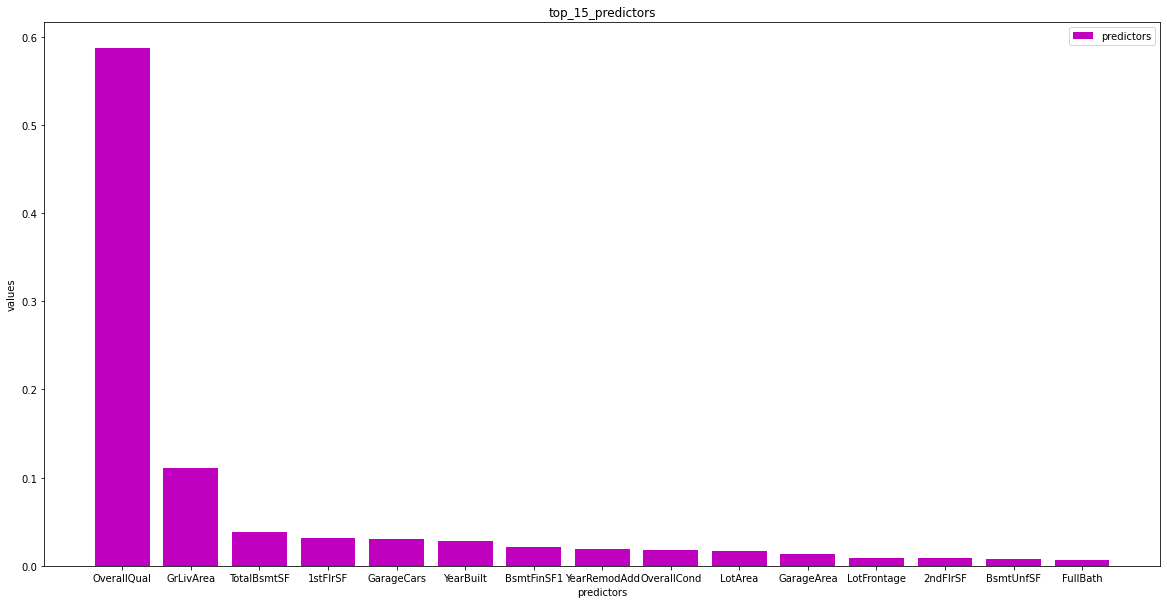

In [225]:
# Visualisez
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.bar(predictors, values,color='m')
# Creating the legend of the bars in the plot
plt.legend(labels = ['predictors','values'])
# Giving the tilte for the plot
plt.title("top_15_predictors")
# Namimg the x and y axis
plt.xlabel('predictors')
plt.ylabel('values')
# Displaying the bar plot
plt.show()


# Conclusion

Que pouvez-vous tirer comme conclusion :

    - quel est le meilleur modèle pour prédire le prix de la maison ?

    - Quelles sont les variables à retenir pour prédire le prix d'une maison ?

# les variables à retenir pour prédire le prix d'une maison sont:


# Fin